In [7]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\user1\\Desktop\\Brainihacks\\BrainiBeats')

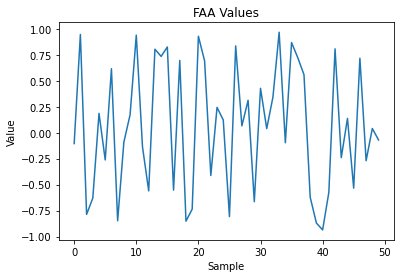

In [8]:
faa = np.random.uniform(-1,1,50)
faa


In [16]:


ionian = [ "62", "64", "65", "67", "81", "83", "72"]  #Bright, Joyful, Stable
dorian = [ "62", "63" ,"65", "67", "81", "82", "72"] #Jazzy, Bluesy, Rocky, Thoughtful, Uncertain, Sophisticated
phrygian = [ "61" ,"63", "65", "67", "80", "82", "72"]  #Exotic, Latin, Lively, Dark, Mystic
lydian =  [ "62" , "64" , "66" , "67" ,"81" ,"83", "72"] # Hopeful, Dreamy, Heavenly, Yearning, Ethereal, Uplifting
mixolydian = ["62" , "64" , "65" , "67" , "81" , "82", "72"] #Positive, Bluesy, Rocky, Poppy, Searching 
aeolian = [ "62" , "63" , "65" , "67" , "80" , "82", "72"] #Sad, Melancholic, Romantic, Oppressive
locrian = [ "61" , "63" , "65" , "66" , "80" , "82", "72"] #Complex, Unstable, Exotic, Tense

scales = {'ionian' : ionian, 'dorian' : dorian, 'phrygian': phrygian, 
          'lydian': lydian, 'mixolydian':mixolydian, 'aeolian':aeolian,'locrian':locrian}
phase = 50

def getStep(num):
    step = 2/7
    return 1-num*step
def get_Scale(faa):
    if faa >= getStep(1):
        return scales.get('ionian')

    elif faa <= getStep(1) and faa >= getStep(2):
        return scales.get('ionian')

    elif faa <= getStep(2) and faa >= getStep(3):
        return scales.get('ionian')

    elif faa <= getStep(3) and faa >= getStep(4):
        return scales.get('ionian')

    elif faa <= getStep(4) and faa >= getStep(5):
        return scales.get('lydian')

    elif faa <= getStep(5) and faa >= getStep(6):
        return scales.get('aeolian')

    elif faa <= getStep(6) and faa >= getStep(7):
        return scales.get('aeolian')
    else:
        return scales.get('aeolian')
    


meanFAA = np.mean(faa)
mode = get_Scale(meanFAA)
print(mode)
    

['62', '64', '66', '67', '81', '83', '72']


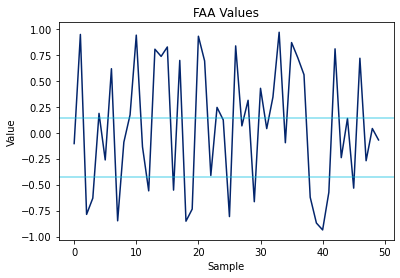

In [27]:
plt.plot(faa, color = '#03256C')
plt.title('FAA Values')
plt.xlabel('Sample')
plt.ylabel('Value')

plt.axhline(y = getStep(3), color = '#06BEE1', alpha = 0.5)
plt.axhline(y = getStep(5), color = '#06BEE1', alpha = 0.5)

#plt.fill_between(getStep(3), getStep(5))

plt.savefig('FAA Plot', dpi=300
       )


<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
c = 40
alpha = 1.1
amp = 0


alphas = np.random.uniform(0.5, 1.5, 50)
amps = np.random.uniform(150, 200, 50)


def midiRange(c, alpha, amp):
    lamp = np.log10(amp)
    return  (c/alpha)*lamp

def midiNote(num):
    return 0

midis = midiRange(c, alphas, amps)
plt.scatter(x = np.arange(0,50) , y = midis)
print(midis)

In [ ]:


def midiNums(arr, mode):
    midis_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler(feature_range=(int(mode[0]), int(mode[-1])))
    scaler = scaler.fit(midis_arr)
    midis_scaled = scaler.transform(midis_arr)
    return midis_scaled

# Checking reconstruction
#X_rec = scaler.inverse_transform(X_scaled)
scaled = midiNums(midis, mode)
print(scaled)

In [ ]:
def getNote(mode, midi_scaled):
    
    #midis_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 7))
    scaler = scaler.fit(midi_scaled)
    note_index = scaler.transform(midi_scaled)
    rounded = np.round(note_index)
    return rounded
    


notes = getNote(mode, scaled)
#plt.scatter(x = np.arange(50), y = notes)
plt.hist(notes)